In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [137]:
df = pd.read_excel("C:/Users/George/Documents/Football Analytics/Data/Champ Salaries.xlsx")

In [138]:
df.rename(columns = {'Unnamed: 0':'Team'}, inplace = True)

In [139]:
df['Team'] = df['Team'].replace('Norwich', 'Norwich City')
df['Team'] = df['Team'].replace('Blackburn Rovers', 'Blackburn')
df['Team'] = df['Team'].replace('Huddersfield Town', 'Huddersfield')
df['Team'] = df['Team'].replace('Sheffield Wednesday', 'Sheffield Weds')
df['Team'] = df['Team'].replace('Rotherham United', 'Rotherham Utd')


In [140]:
df['Badge'] = df['Team'].apply(lambda x: f"C:/Users/George/Documents/Football Analytics/Team Logos/{x.lower()}_logo.png")

In [141]:
df['Weekly Salary'] = df['Weekly Salary'].apply(lambda x: str(x)[:-3])
df['Weekly Salary'] = df['Weekly Salary'].astype(int)

In [142]:
df

,Team,xGD,Pos,Weekly Salary,Badge
0,Leeds United,35.8,1,703,C:/Users/George/Documents/Football Analytics/T...
1,Leicester City,32.4,2,1100,C:/Users/George/Documents/Football Analytics/T...
2,Ipswich Town,24.3,3,259,C:/Users/George/Documents/Football Analytics/T...
3,Southampton,26.6,4,775,C:/Users/George/Documents/Football Analytics/T...
4,West Brom,6.8,5,465,C:/Users/George/Documents/Football Analytics/T...
5,Norwich City,0.2,6,399,C:/Users/George/Documents/Football Analytics/T...
6,Hull City,6.0,7,356,C:/Users/George/Documents/Football Analytics/T...
7,Coventry City,11.9,8,190,C:/Users/George/Documents/Football Analytics/T...
8,Preston,-12.8,9,202,C:/Users/George/Documents/Football Analytics/T...
9,Middlesbrough,14.3,10,311,C:/Users/George/Documents/Football Analytics/T...


C:\Users\dmsta\AppData\Local\Temp\ipykernel_25768\2257411866.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('coolwarm')


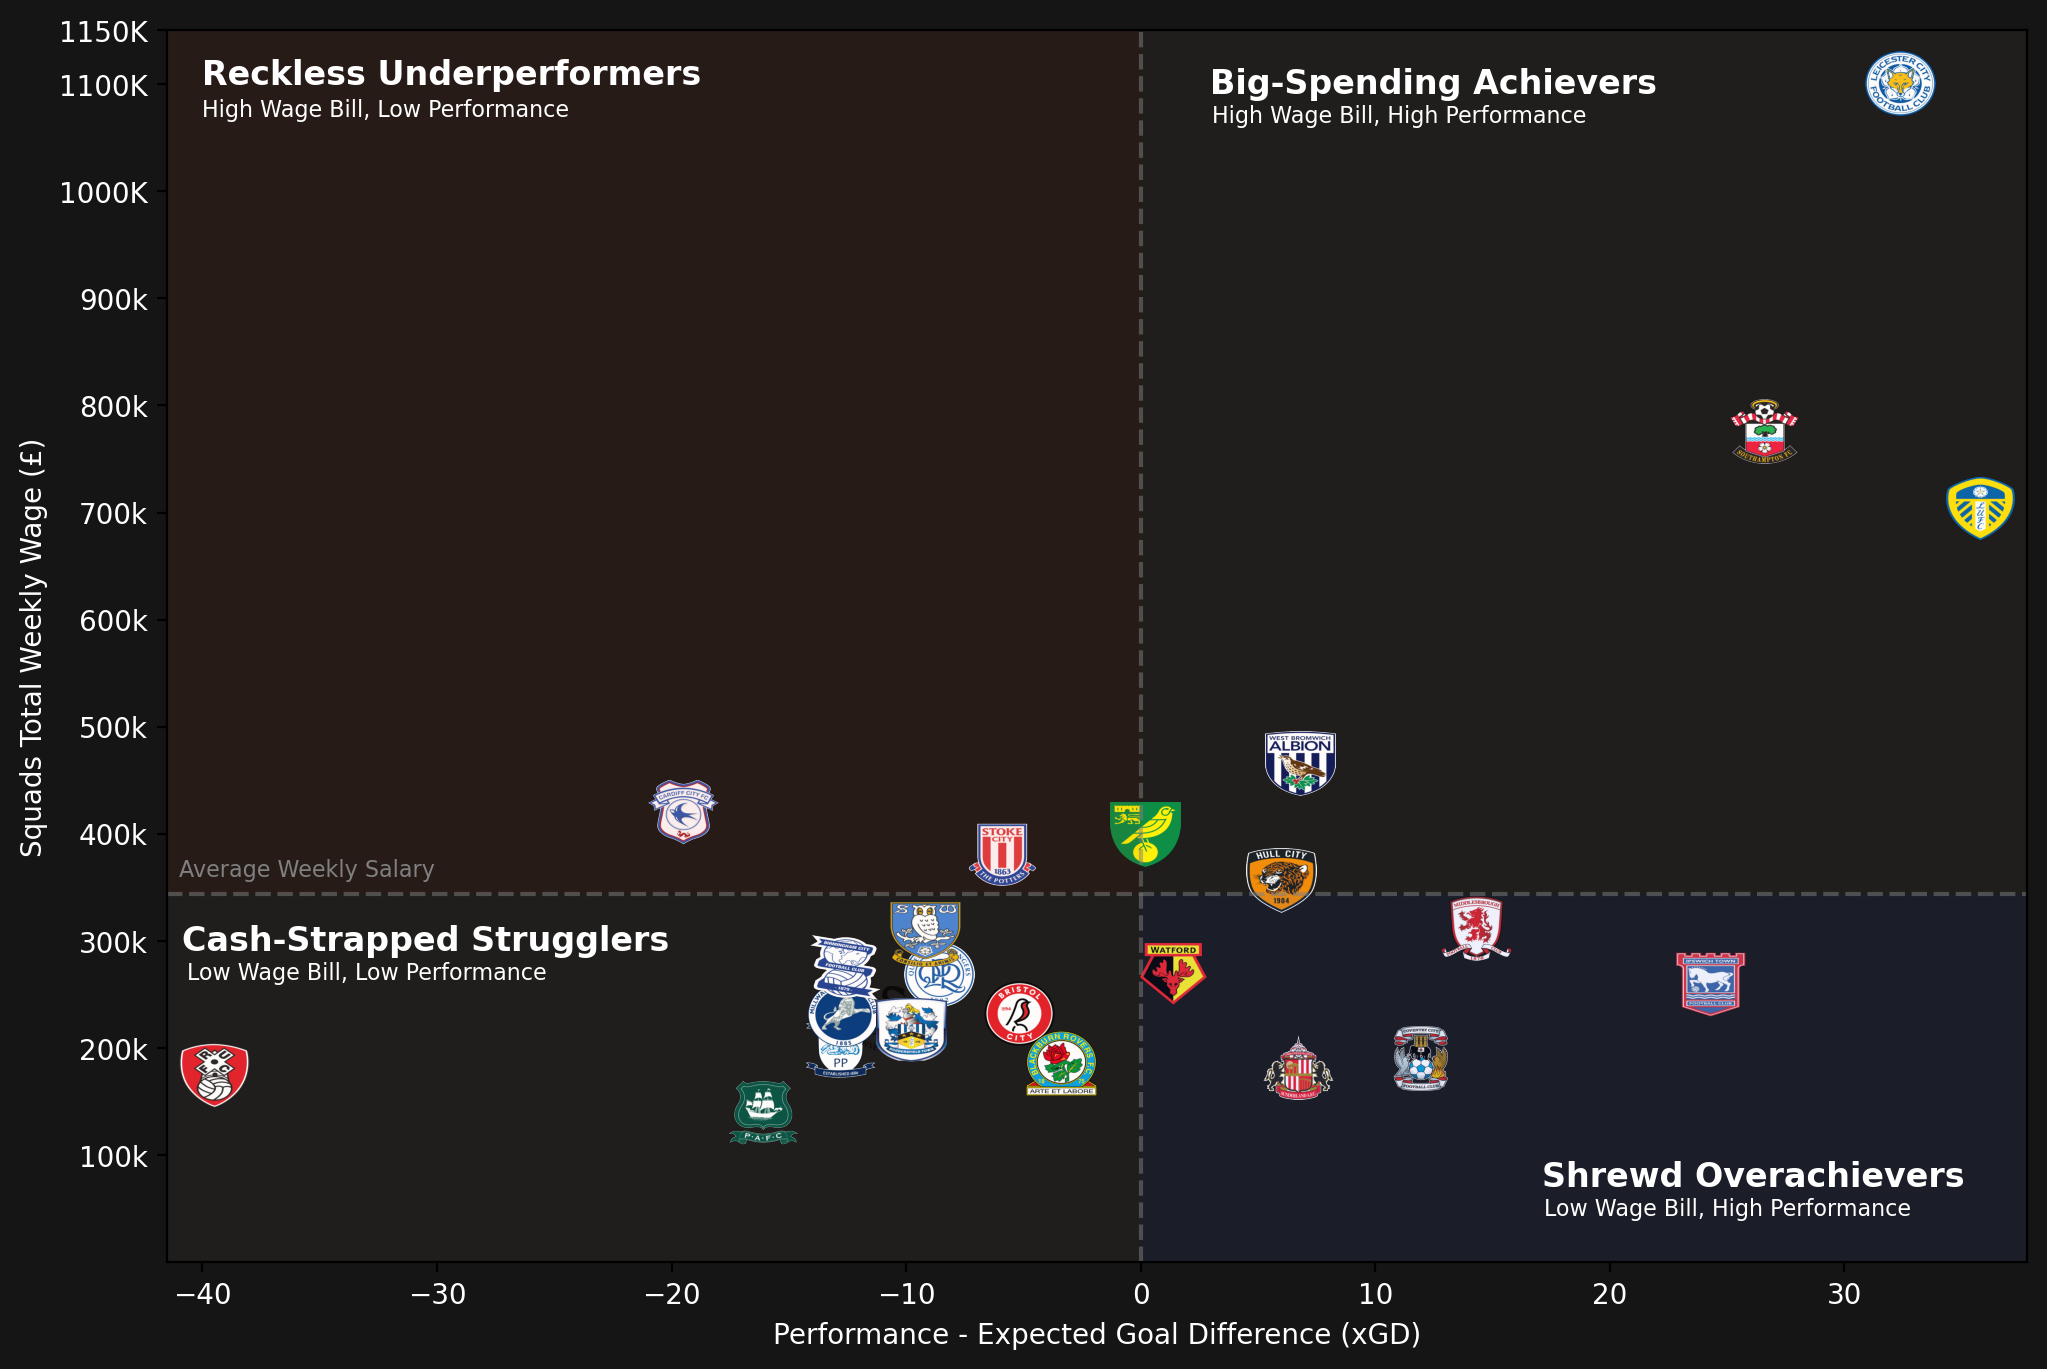

In [229]:
import matplotlib.patches as patches

plt.figure(figsize=(12, 8), dpi=200, facecolor='#141514')  # Set the facecolor to #141514

# Plot the badge at each point
for i, team in df.iterrows():
    badge = plt.imread(team['Badge'])
    plt.imshow(badge, extent=(team['xGD']-1.5, team['xGD']+1.5, team['Weekly Salary']-30, team['Weekly Salary']+30), aspect='auto', alpha=1)

# Add labels and title
plt.xlabel('Performance - Expected Goal Difference (xGD)', color='white')  # Set the xlabel color to white
plt.ylabel('Squads Total Weekly Wage (£)', color='white')  # Set the ylabel color to white
plt.yticks([100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1150], ['100k', '200k', '300k', '400k', '500k', '600k', '700k', '800k', '900k', '1000K', '1100K', '1150K'], color='white')  # Set the yticks color to white

# Adjust the plot limits if needed
# Calculate the average value
average_value = df['Weekly Salary'].mean()

# Draw a line from the y-axis at the average value
plt.axhline(average_value, color='grey', linestyle='--', alpha=0.5)
plt.axvline(0, color='grey', linestyle='--', alpha=0.5)

# Set the colors for each quadrant
#colors = ['green', 'yellow', 'blue', 'red']
import matplotlib.cm as cm

# Set the colors for each quadrant using a colormap
cmap = cm.get_cmap('coolwarm')
colors = [cmap(0.1), cmap(0.3), cmap(0.6), cmap(0.9)]

# Create the rectangles
rect1 = patches.Rectangle((0, average_value), df['xGD'].max()+2, df['Weekly Salary'].max()+50 - average_value, facecolor=colors[2], alpha=0.05)
rect2 = patches.Rectangle((0, 0), df['xGD'].max()+2, average_value, facecolor=colors[0], alpha=0.1)
rect3 = patches.Rectangle((df['xGD'].min()-2, average_value), -df['xGD'].min()+2, df['Weekly Salary'].max()+50 - average_value, facecolor=colors[3], alpha=0.1)
rect4 = patches.Rectangle((df['xGD'].min()-2, 0), -df['xGD'].min()+2, average_value, facecolor=colors[2], alpha=0.05)

# Add the rectangles to the plot
plt.gca().add_patch(rect1)
plt.gca().add_patch(rect2)
plt.gca().add_patch(rect3)
plt.gca().add_patch(rect4)
plt.xlim(df['xGD'].min()-2, df['xGD'].max()+2)
plt.ylim(0, df['Weekly Salary'].max()+50)

# Set the ticks color to white
plt.xticks(color='white')
plt.yticks(color='white')

# Set the plot background color to #141514
plt.gca().set_facecolor('#141514')
# Add text box in each quadrant
plt.text(-40, 1100, 'Reckless Underperformers', color='white', fontsize=12, weight='bold')
plt.text(-40, 1070, 'High Wage Bill, Low Performance', color='white', fontsize=8)
plt.text(-30.5, 300, 'Cash-Strapped Strugglers', color='white', fontsize=12, weight='bold', ha='center', va='center')
plt.text(-33, 270, 'Low Wage Bill, Low Performance', color='white', ha='center', va='center', fontsize=8)
plt.text(12.5, 1100, 'Big-Spending Achievers', color='white', fontsize=12, weight='bold', ha='center', va='center')
plt.text(11, 1070, 'High Wage Bill, High Performance', color='white', ha='center', va='center', fontsize=8)
plt.text(26.1, 80, 'Shrewd Overachievers', color='white', fontsize=12, weight='bold', ha='center', va='center')
plt.text(25, 50, 'Low Wage Bill, High Performance', color='white', ha='center', va='center', fontsize=8)
plt.text(-41,360, 'Average Weekly Salary', color='grey', fontsize=8)
plt.show()
